In [15]:
#!pip install -U finance-datareader

In [16]:
#!pip install pymysql

In [17]:
#!pip install cryptography

In [1]:
import matplotlib.pyplot as plt

In [18]:
import pymysql

In [19]:
import FinanceDataReader as fdr
import pandas as pd

In [20]:
# 한국거래소 상장종목 전체
df_krx = fdr.StockListing('KRX')
df_krx.head(5)

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,73600,1,500,0.68,73800,73800,73500,1373253,101236865500,439375995680000,5969782550,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,137800,1,1100,0.80,137000,138000,137000,393594,54080475800,100318725897000,728002365,STK
2,373220,KR7373220003,LG에너지솔루션,KOSPI,,428000,1,5500,1.30,426500,429000,425500,28165,12018284500,100152000000000,234000000,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,701000,1,3000,0.43,702000,703000,700000,2265,1589516000,49892974000000,71174000,STK
4,005935,KR7005931001,삼성전자우,KOSPI,,59800,2,-100,-0.17,59900,60000,59700,151191,9050939100,49208624660000,822886700,STK


In [21]:
df_krx['Close'].astype(int)

0        73600
1       137800
2       428000
3       701000
4        59800
         ...  
2781      2720
2782        65
2783      1590
2784       598
2785        98
Name: Close, Length: 2786, dtype: int32

In [35]:
df = fdr.DataReader('005930', '2021')
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,0.024691
2021-01-05,81600,83900,81600,83900,35335669,0.010843
2021-01-06,83300,84500,82100,82200,42089013,-0.020262
2021-01-07,82800,84200,82700,82900,32644642,0.008516
2021-01-08,83300,90000,83000,88800,59013307,0.071170
...,...,...,...,...,...,...
2023-12-11,72800,73000,72200,73000,9861960,0.005510
2023-12-12,73300,73500,73100,73500,13758646,0.006849
2023-12-13,73300,73500,72800,72800,13116766,-0.009524


In [23]:
df = fdr.DataReader('005930', '2015')
pd.DataFrame(df.iloc[:,3])

,Close
Date,
2015-01-02,26600
2015-01-05,26660
2015-01-06,25900
2015-01-07,26140
2015-01-08,26280
...,...
2023-12-11,73000
2023-12-12,73500
2023-12-13,72800


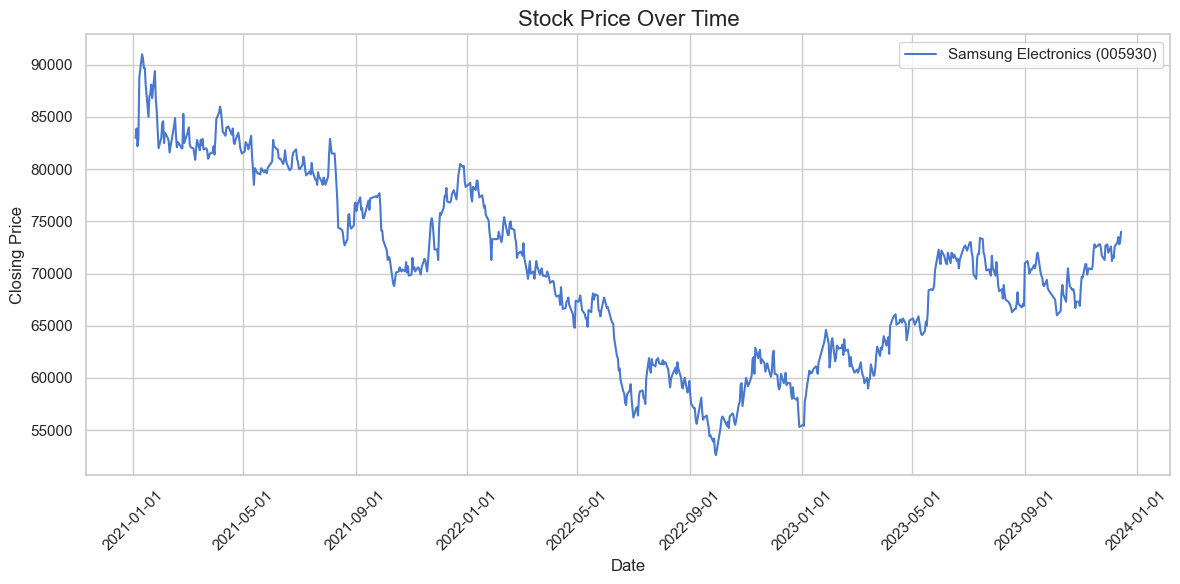

In [24]:
import FinanceDataReader as fdr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# 주식 데이터 불러오기
df = fdr.DataReader('005930', '2021')

# DataFrame에서 일부 데이터 선택
selected_data = pd.DataFrame(df.iloc[:, 3])

# 그래프 스타일 설정 (Seaborn 스타일)
sns.set(style="whitegrid", palette="muted", color_codes=True)
plt.figure(figsize=(12, 6))

# 그래프 그리기 (Seaborn을 사용한 경우)
ax = sns.lineplot(x=selected_data.index, y='Close', data=selected_data, label='Samsung Electronics (005930)')

# x축 날짜 포맷 지정
date_format = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_format)

# 그래프 타이틀 및 레이블 추가
plt.title('Stock Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.legend()

# 그리드 및 틱 설정
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 표시
plt.show()


In [25]:
import FinanceDataReader as fdr
import plotly.express as px

# 주식 데이터 불러오기
df = fdr.DataReader('005930', '2021')

# DataFrame에서 일부 데이터 선택
selected_data = pd.DataFrame(df.iloc[:, 3])

# Plotly Express를 사용하여 그래프 생성
fig = px.line(selected_data, x=selected_data.index, y='Close', labels={'Close': 'Closing Price'},
              title='Stock Price Over Time - Samsung Electronics (005930)',
              line_shape="linear", render_mode="svg")

# 그래프 스타일 및 레이아웃 설정
fig.update_traces(line=dict(color='blue', width=2))
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Closing Price',
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=True,
        zeroline=False,
        showline=False,
        showticklabels=True,
    ),
    showlegend=True,
    autosize=False,
    margin=dict(
        autoexpand=False,
        l=50,
        r=20,
        t=70,
    ),
    paper_bgcolor='white',
    plot_bgcolor='white',
)

# 그래프 표시
fig.show()


c:\dev\python\.venv\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [44]:
import FinanceDataReader as fdr
import plotly.express as px

# 주식 데이터 불러오기
df = fdr.DataReader('005930', '2023-12')

# DataFrame에서 일부 데이터 선택
selected_data = pd.DataFrame(df.iloc[:, 3])

# Plotly Express를 사용하여 그래프 생성
fig = px.line(selected_data, x=selected_data.index, y='Close', labels={'Close': 'Closing Price'},
              title='Stock Price Over Time - Samsung Electronics (005930)',
              line_shape="linear", render_mode="svg")

# 그래프 스타일 및 레이아웃 설정
fig.update_traces(line=dict(color='rgba(76, 59, 232, 0.65)', width=2))
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Closing Price',
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=True,
        zeroline=False,
        showline=False,
        showticklabels=True,
    ),
    showlegend=True,
    autosize=False,
    margin=dict(
        autoexpand=False,
        l=50,
        r=20,
        t=70,
    ),
    paper_bgcolor='white',  # 투명한 하늘색 배경
    plot_bgcolor='rgba(132, 157, 241, 0.5)',  # 투명한 하늘색 배경
)

# 그래프 표시
fig.show()


c:\dev\python\.venv\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [9]:
'''
DBeaver에서 root계정으로 실행하면 됩니다.

CREATE DATABASE miniprojectdb;
GRANT ALL PRIVILEGES ON miniprojectdb.* TO 'urstory'@'%';
FLUSH PRIVILEGES;
'''

"\nDBeaver에서 root계정으로 실행하면 됩니다.\n\nCREATE DATABASE miniprojectdb;\nGRANT ALL PRIVILEGES ON miniprojectdb.* TO 'urstory'@'%';\nFLUSH PRIVILEGES;\n"

In [10]:
import pymysql

In [11]:
conn = pymysql.connect(host='localhost', user='urstory', password='u1234', db='miniprojectdb', charset='utf8')

In [12]:
cur = conn.cursor()

In [13]:
# # 최초에 table 형성할때 한번만 실행하면 OK

# sql= '''create table predict (
# 	name varchar(30) not null COMMENT '기업이름',
# 	tom_pre int not null COMMENT '내일 예측 종가',
#   next_week_pre int not null COMMENT '다음주 예측 종가',
#   next_twoweek_pre int not null COMMENT '다다음주 예측 종가',
# 	PRIMARY KEY(name)
# );
# '''
# cur.execute(sql)

In [17]:
sql = '''INSERT into predict (name, tom_pre,next_week_pre, next_twoweek_pre) 
VALUE('일성전자', "70000", "75000","78000");'''
cur.execute(sql)

1

In [18]:
cur.execute("SELECT * FROM predict;")

2

In [19]:
for row in cur:
		print(row[0], row[1], row[2], row[3])

삼성전자 70000 75000 78000
일성전자 70000 75000 78000
